In [194]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
# import lazypredict

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

import statsmodels.tsa.stattools as st
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA

from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [195]:
df_ger = pd.read_csv('Data/China.csv',  index_col='Year')
df_ger # the one with categorical variable for Germany

,Country,ISO 3166-1 alpha-3,Total,Coal,Oil,Gas
Year,,,,,,
1980,China,CHN,1494.495884,1122.664256,273.202496,27.318784
1981,China,CHN,1476.487854,1125.004730,256.374392,24.387646
1982,China,CHN,1606.585013,1248.856080,257.810032,22.900000
1983,China,CHN,1694.216811,1321.842960,263.771360,23.438608
1984,China,CHN,1844.828012,1454.197632,271.451104,24.226368
1985,China,CHN,1998.082904,1584.511456,284.593872,24.819936
1986,China,CHN,2104.213354,1657.391354,303.068297,26.351535
1987,China,CHN,2257.738539,1770.268928,321.523328,26.600640
1988,China,CHN,2425.893553,1892.697824,343.129936,27.311456


In [196]:
# Drop the categorial variables
df= df_ger.select_dtypes(include=['float64'])
df

,Total,Coal,Oil,Gas
Year,,,,
1980,1494.495884,1122.664256,273.202496,27.318784
1981,1476.487854,1125.004730,256.374392,24.387646
1982,1606.585013,1248.856080,257.810032,22.900000
1983,1694.216811,1321.842960,263.771360,23.438608
1984,1844.828012,1454.197632,271.451104,24.226368
1985,1998.082904,1584.511456,284.593872,24.819936
1986,2104.213354,1657.391354,303.068297,26.351535
1987,2257.738539,1770.268928,321.523328,26.600640
1988,2425.893553,1892.697824,343.129936,27.311456


In [197]:
#  plot to see total emission versus year for 'Germany'
fig_ger = px.line(df, x=df.index, y="Total")
fig_ger.update_xaxes(rangeslider_visible=True)
fig_ger.show()

Visualize the time series

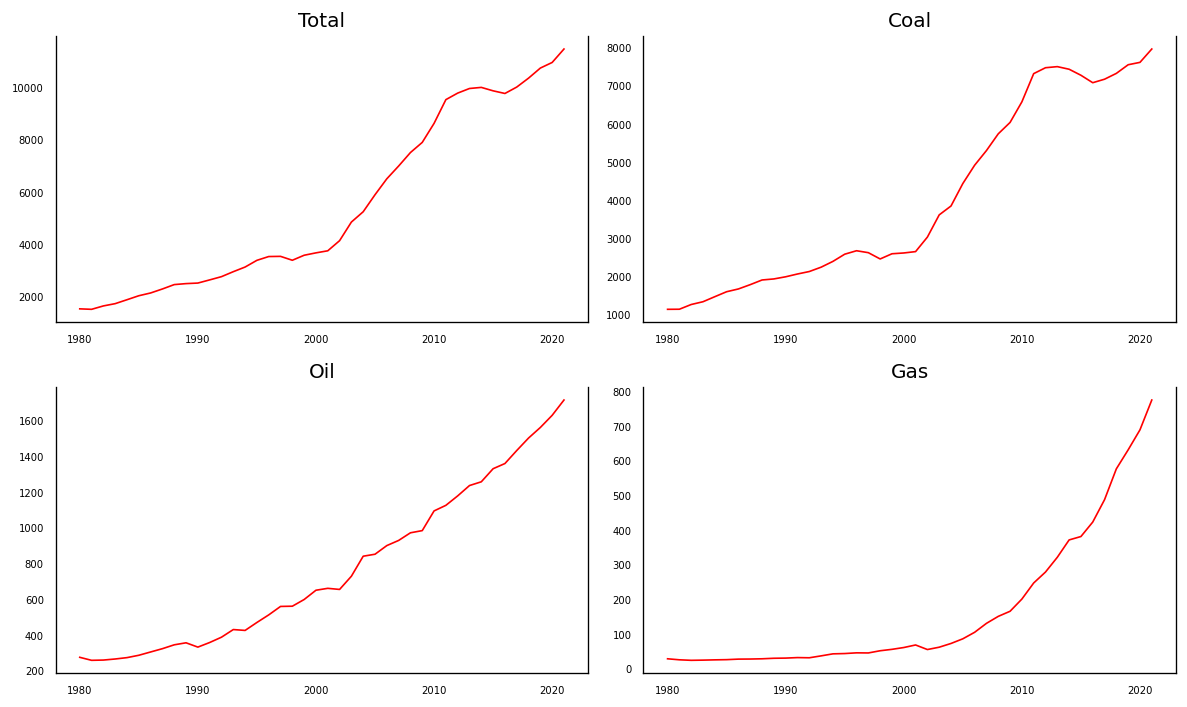

In [198]:
# Plot
fig, axes = plt.subplots(nrows=2, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

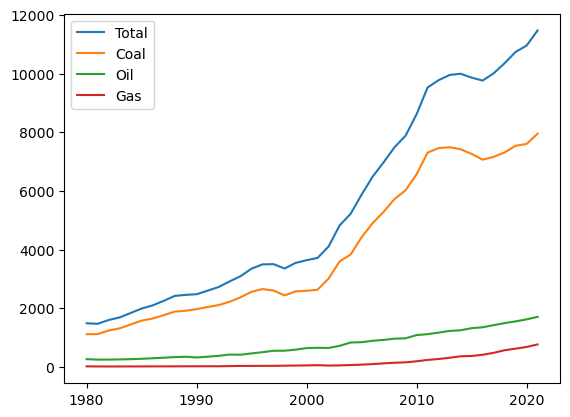

In [199]:
plt.figure()

x = df.index
y1 = df['Total']
y2 = df['Coal']
y3 = df['Oil']
y4 = df['Gas']






plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.plot(x,y4)




plt.legend(['Total', 'Coal', 'Oil', 'Gas'])

Grainger's Causality Test

In [200]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df, variables = df.columns)   

,Total_x,Coal_x,Oil_x,Gas_x
Total_y,1.0,0.0,0.0,0.0
Coal_y,0.0,1.0,0.0,0.0
Oil_y,0.0,0.0,1.0,0.0
Gas_y,0.0,0.0,0.0,1.0


 Cointegration Test

In [201]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Total  ::  99.24     > 40.1749   =>   True
Coal   ::  48.49     > 24.2761   =>   True
Oil    ::  9.24      > 12.3212   =>   False
Gas    ::  0.0       > 4.1296    =>   False


Split the Series into Training and Testing Data

In [202]:
nobs = 5
df_train, df_test = df[0:-nobs], df[-nobs:]

# Check size
print(df_train.shape)  
print(df_test.shape) 

(37, 4)
(5, 4)


Check for Stationarity and Make the Time Series Stationary

In [203]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    

In [204]:
# ADF Test on each column
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Total" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 1.8586
 No. Lags Chosen       = 10
 Critical value 1%     = -3.711
 Critical value 5%     = -2.981
 Critical value 10%    = -2.63
 => P-Value = 0.9985. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Coal" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.8437
 No. Lags Chosen       = 1
 Critical value 1%     = -3.633
 Critical value 5%     = -2.949
 Critical value 10%    = -2.613
 => P-Value = 0.8059. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Oil" 
    -----------------------------------------------
 Null Hypothesis: Data has unit roo

In [205]:
# The ADF test confirms none of the time series is stationary. Let’s difference all of them once and check again.
# 1st difference
df_differenced = df_train.diff().dropna()

In [206]:
# Re-run ADF test on each differenced series.
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Total" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.3122
 No. Lags Chosen       = 0
 Critical value 1%     = -3.633
 Critical value 5%     = -2.949
 Critical value 10%    = -2.613
 => P-Value = 0.1681. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Coal" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.3456
 No. Lags Chosen       = 0
 Critical value 1%     = -3.633
 Critical value 5%     = -2.949
 Critical value 10%    = -2.613
 => P-Value = 0.1577. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Oil" 
    -----------------------------------------------
 Null Hypothesis: Data has unit ro

In [207]:
# Let’s difference all of them once more and check again.
# 2nd difference
df_differenced = df_differenced.diff().dropna()

In [208]:
# Re-run ADF test on each differenced series.
# ADF Test on each column of 2nd Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Total" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.6598
 No. Lags Chosen       = 0
 Critical value 1%     = -3.639
 Critical value 5%     = -2.951
 Critical value 10%    = -2.614
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Coal" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.9805
 No. Lags Chosen       = 0
 Critical value 1%     = -3.639
 Critical value 5%     = -2.951
 Critical value 10%    = -2.614
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Oil" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05


How to Select the Order (P) of VAR model

In [209]:
# To select the right order of the VAR model, we iteratively fit increasing orders of VAR model and pick the order that gives a model with least AIC.
# Though the usual practice is to look at the AIC, you can also check other best fit comparison estimates of BIC, FPE and HQIC.

model = VAR(df_differenced)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  28.331511885287778
BIC :  29.229371017414934
FPE :  2032127849293.9937
HQIC:  28.63770756320453 

Lag Order = 2
AIC :  28.03814289933974
BIC :  29.67069660275772
FPE :  1590052052845.0981
HQIC:  28.587447548229242 

Lag Order = 3
AIC :  27.513152255297868
BIC :  29.894973097347425
FPE :  1084398203305.1755
HQIC:  28.302658478818287 

Lag Order = 4
AIC :  27.50482166001376
BIC :  30.650341979529564
FPE :  1514792544198.032
HQIC:  28.530182851711533 

Lag Order = 5
AIC :  26.26133083441571
BIC :  30.184683503069742
FPE :  969198284594.4258
HQIC:  27.516445062344342 

Lag Order = 6
AIC :  18.794575360560508
BIC :  23.50938856741042
FPE :  4881812384.844402
HQIC:  20.271196035823806 

Lag Order = 7
AIC :  -214.8673826212776
BIC :  -209.34824965055176
FPE :  1.2862956956716587e-90
HQIC:  -213.18012864964462 

Lag Order = 8
AIC :  -219.64828253721933
BIC :  -213.31308008119817
FPE :  2.2989419248356768e-96
HQIC:  -217.76449473354563 

Lag Order = 9
AIC :  -221.4482050817

In [210]:
# An alternate method to choose the order(p) of the VAR models is to use the model.select_order(maxlags) method.
#x = model.select_order(maxlags=6)
#x.summary()

We choose d = 3 as the number of lags (AIC and BIC is locally minimum)

Train the VAR Model of Selected Order(p)

In [211]:
p=3
model_fitted = model.fit(p)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 07, Mar, 2023
Time:                     14:57:50
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    29.8950
Nobs:                     32.0000    HQIC:                   28.3027
Log likelihood:          -569.835    FPE:                1.08440e+12
AIC:                      27.5132    Det(Omega_mle):     2.77293e+11
--------------------------------------------------------------------
Results for equation Total
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const           40.354186        35.332311            1.142           0.253
L1.Total         1.449847         2.245132            0.646           0.518
L1.Coal         -1.495524         2.387472           -0.626           0.531
L1.O

Check for Serial Correlation of Residuals (Errors) using Durbin Watson Statistic. Results close to 2 is alright.

In [212]:
from statsmodels.stats.stattools import durbin_watson

def adjust(val, length= 6): return str(val).ljust(length)
out = durbin_watson(model_fitted.resid)

for col, val in zip(df.columns, out):
    print(adjust(col), ':', round(val, 2))

Total  : 2.0
Coal   : 1.96
Oil    : 1.68
Gas    : 1.95


How to Forecast VAR model using statsmodels

In [213]:
df_differenced

,Total,Coal,Oil,Gas
Year,,,,
1982,148.105189,121.510876,18.263744,1.443492
1983,-42.465361,-50.864470,4.525688,2.026254
1984,62.979403,59.367792,1.718416,0.249152
1985,2.643691,-2.040848,5.463024,-0.194192
1986,-47.124442,-57.433926,5.331657,0.938031
1987,47.394735,39.997676,-0.019394,-1.282494
1988,14.629829,9.551322,3.151577,0.461711
1989,-130.394200,-94.887348,-10.295300,0.798796
1990,-16.560361,28.903112,-35.461272,-1.029672


In [214]:
# In order to forecast, the VAR model expects up to the lag order number of observations from the past data.
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input # the output is the values of total, coal, oil and gas for 2015 and 2016 (this depends on the train test split and lag_order)

3


array([[-134.713675,  -97.035666,  -36.926718,    7.56592 ],
       [-174.029915,  -89.700155,   52.21663 ,  -40.263432],
       [  29.792362,  -37.487257,  -44.167381,   31.843375]])

In [215]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs) # nobs is from test train split ratio
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns + '_2d')
df_forecast

,Total_2d,Coal_2d,Oil_2d,Gas_2d
Year,,,,
2017,-27.438794,-87.241183,76.772123,-7.433502
2018,504.495769,609.234953,-57.636313,-17.519915
2019,-340.997680,-484.832010,64.869102,27.480354
2020,-117.563074,-42.099331,-48.365201,-6.317535
2021,577.938083,613.351400,-2.272931,-12.450752


Invert the transformation to get the real forecast

In [216]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [217]:
df_results = invert_transformation(df_train, df_forecast, second_diff=True)        
df_results.loc[:, ['Total_forecast', 'Coal_forecast', 'Oil_forecast','Gas_forecast']]

,Total_forecast,Coal_forecast,Oil_forecast,Gas_forecast
Year,,,,
2017,9635.616378,6788.587411,1463.642214,455.966768
2018,10010.748780,7115.006065,1511.810538,472.687381
2019,10044.883503,6956.592709,1624.847965,516.888349
2020,9961.455152,6756.080021,1689.520190,554.771781
2021,10455.964883,7168.918733,1751.919484,580.204462


In [218]:
df_test

,Total,Coal,Oil,Gas
Year,,,,
2017,10011.107108,7163.317856,1430.586816,486.359360
2018,10353.876989,7316.399776,1500.473952,575.368912
2019,10740.996069,7543.157408,1559.728160,630.171360
2020,10956.213369,7605.716883,1627.725238,687.880944
2021,11472.369171,7955.985419,1713.339980,773.866062


Plot of Forecast vs Actuals

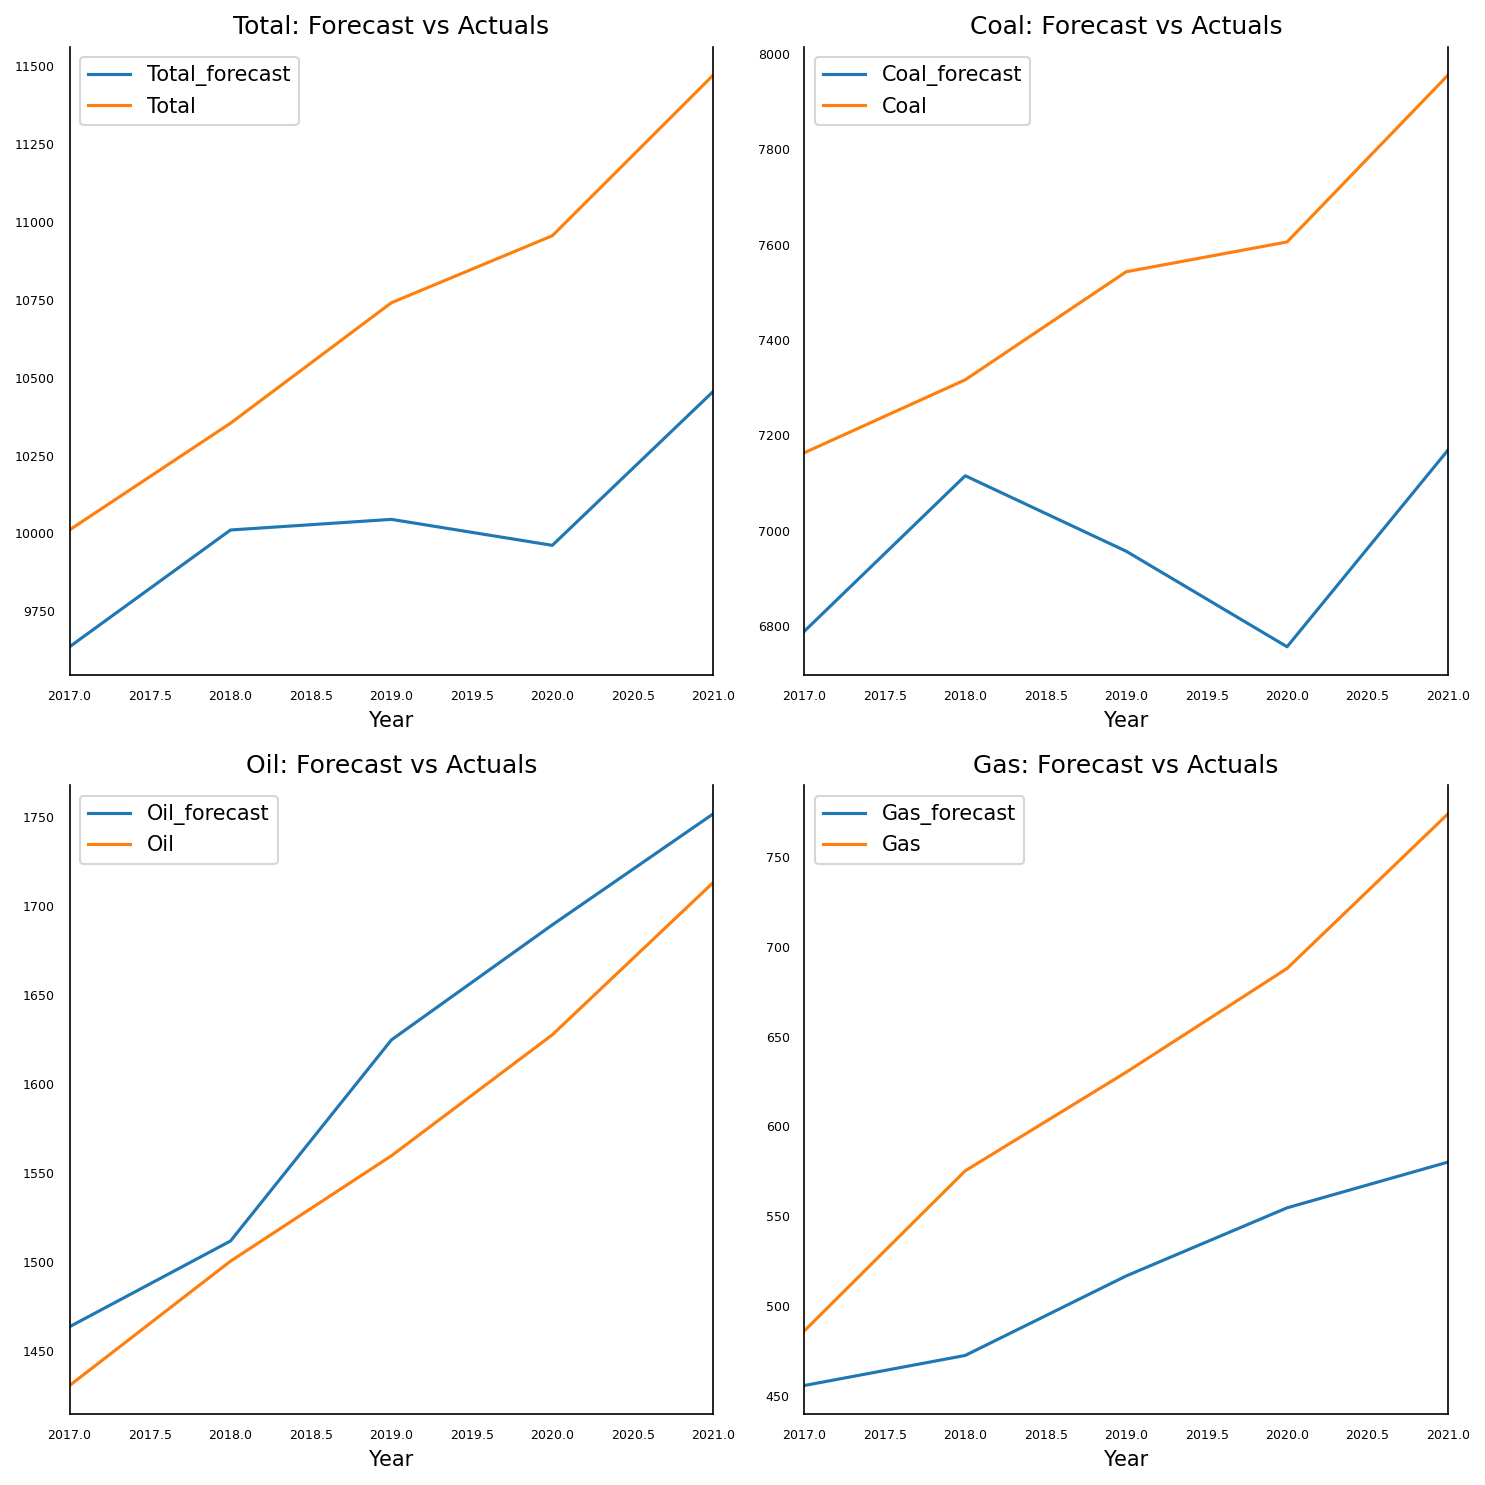

In [219]:
fig, axes = plt.subplots(nrows=int(len(df.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

Evaluate the Forecasts

In [220]:
# To evaluate the forecasts, let’s compute a comprehensive set of metrics, namely, the MAPE, ME, MAE, MPE, RMSE, corr and minmax.
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

print('Forecast Accuracy of: Total')
accuracy_prod = forecast_accuracy(df_results['Total_forecast'].values, df_test['Total'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: Coal')
accuracy_prod = forecast_accuracy(df_results['Coal_forecast'].values, df_test['Coal'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: Oil')
accuracy_prod = forecast_accuracy(df_results['Oil_forecast'].values, df_test['Oil'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: Gas')
accuracy_prod = forecast_accuracy(df_results['Gas_forecast'].values, df_test['Gas'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))


Forecast Accuracy of: Total
mape   :  0.063
me     :  -685.1788
mae    :  685.1788
mpe    :  -0.063
rmse   :  743.764
corr   :  0.9006
minmax :  0.063

Forecast Accuracy of: Coal
mape   :  0.0736
me     :  -559.8785
mae    :  559.8785
mpe    :  -0.0736
rmse   :  610.966
corr   :  0.4572
minmax :  0.0736

Forecast Accuracy of: Oil
mape   :  0.0266
me     :  41.9772
mae    :  41.9772
mpe    :  0.0266
rmse   :  46.4085
corr   :  0.9855
minmax :  0.0258

Forecast Accuracy of: Gas
mape   :  0.1729
me     :  -114.6256
mae    :  114.6256
mpe    :  -0.1729
rmse   :  126.1135
corr   :  0.9766
minmax :  0.1729


Forecasting the future: for 2 years (since p=2)

In [221]:
df_differenced_all = df.diff().dropna()

In [222]:
df_differenced_all

,Total,Coal,Oil,Gas
Year,,,,
1981,-18.008030,2.340474,-16.828104,-2.931138
1982,130.097159,123.851350,1.435640,-1.487646
1983,87.631798,72.986880,5.961328,0.538608
1984,150.611201,132.354672,7.679744,0.787760
1985,153.254892,130.313824,13.142768,0.593568
1986,106.130450,72.879898,18.474425,1.531599
1987,153.525185,112.877574,18.455031,0.249105
1988,168.155014,122.428896,21.606608,0.710816
1989,37.760814,27.541548,11.311308,1.509612


In [223]:
forecast_input_all = df_differenced_all.values[-lag_order:]
forecast_input_all # the output is the values of total, coal, oil and gas for 2015 and 2016 (this depends on the train test split and lag_order)

array([[387.11908 , 226.757632,  59.254208,  54.802448],
       [215.2173  ,  62.559475,  67.997078,  57.709584],
       [516.155802, 350.268536,  85.614742,  85.985118]])

In [224]:
model_all = VAR(df_differenced_all)
model_fitted_all = model_all.fit(p)
model_fitted_all.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 07, Mar, 2023
Time:                     14:57:52
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    30.6026
Nobs:                     38.0000    HQIC:                   29.1590
Log likelihood:          -702.550    FPE:                2.32938e+12
AIC:                      28.3617    Det(Omega_mle):     7.17949e+11
--------------------------------------------------------------------
Results for equation Total
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const           95.708448        74.368827            1.287           0.198
L1.Total        -0.945559         2.454182           -0.385           0.700
L1.Coal          1.797702         2.619371            0.686           0.493
L1.O

In [225]:
# Forecast

l = df_differenced_all.last_valid_index() # gives the index of the last row in df_differenced_all
s = 10 # steps to future
fc_all = model_fitted_all.forecast(y=forecast_input_all, steps=s) 
df_forecast_all = pd.DataFrame(fc_all, index=list(range(l+1,l+s+1)), columns=df.columns + '_2d')
df_forecast_all

,Total_2d,Coal_2d,Oil_2d,Gas_2d
2022,484.384290,263.271996,54.034069,95.374525
2023,380.536363,159.428808,87.358928,90.949270
2024,561.526362,327.851343,100.760506,106.691300
2025,425.739617,180.311026,89.454008,110.757426
2026,402.169839,146.936926,95.627889,118.155112
2027,542.983891,259.939760,108.726512,134.975977
2028,486.715834,190.740337,111.445127,140.710510
2029,448.494317,143.616956,115.881529,148.410016
2030,541.085714,205.921298,127.178377,165.911922
2031,559.110672,198.583096,133.562263,178.852209


In [226]:
# Tranforming the future forecast back
df_results_all = invert_transformation(df, df_forecast_all, second_diff=True) 
df_results_all = df_results_all.loc[:, ['Total_forecast', 'Coal_forecast', 'Oil_forecast','Gas_forecast']]

In [227]:
df_results_all

,Total_forecast,Coal_forecast,Oil_forecast,Gas_forecast
2022,12472.909263,8569.525951,1852.988791,955.225705
2023,13853.985718,9342.495291,2079.996529,1227.534618
2024,15796.588535,10443.315974,2407.764773,1606.534830
2025,18164.930970,11724.447683,2824.987024,2096.292468
2026,20935.443242,13152.516318,3337.837165,2704.205218
2027,24248.939406,14840.524713,3959.413817,3447.093946
2028,28049.151403,16719.273445,4692.435597,4330.693183
2029,32297.857717,18741.639133,5541.338905,5362.702437
2030,37087.649745,20969.926119,6517.420591,6560.623613
2031,42436.552444,23396.796200,7627.064539,7937.396998


In [228]:
# Concate the actual df with the forecasted df till 2031 (df_results_all)

df_results_all = df_results_all.rename(columns={"Total_forecast": "Total", "Coal_forecast": "Coal", "Oil_forecast": "Oil", "Gas_forecast": "Gas"})
# renaming the df_results_all columns to that of df

df_results_all

,Total,Coal,Oil,Gas
2022,12472.909263,8569.525951,1852.988791,955.225705
2023,13853.985718,9342.495291,2079.996529,1227.534618
2024,15796.588535,10443.315974,2407.764773,1606.534830
2025,18164.930970,11724.447683,2824.987024,2096.292468
2026,20935.443242,13152.516318,3337.837165,2704.205218
2027,24248.939406,14840.524713,3959.413817,3447.093946
2028,28049.151403,16719.273445,4692.435597,4330.693183
2029,32297.857717,18741.639133,5541.338905,5362.702437
2030,37087.649745,20969.926119,6517.420591,6560.623613
2031,42436.552444,23396.796200,7627.064539,7937.396998


In [229]:
# Concat syntax
df_future  = pd.concat([df, df_results_all], axis=0)
df_future

,Total,Coal,Oil,Gas
1980,1494.495884,1122.664256,273.202496,27.318784
1981,1476.487854,1125.004730,256.374392,24.387646
1982,1606.585013,1248.856080,257.810032,22.900000
1983,1694.216811,1321.842960,263.771360,23.438608
1984,1844.828012,1454.197632,271.451104,24.226368
1985,1998.082904,1584.511456,284.593872,24.819936
1986,2104.213354,1657.391354,303.068297,26.351535
1987,2257.738539,1770.268928,321.523328,26.600640
1988,2425.893553,1892.697824,343.129936,27.311456
1989,2463.654367,1920.239372,354.441244,28.821068


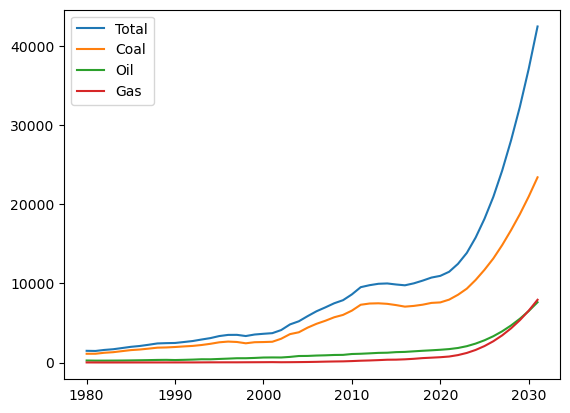

In [230]:
# Plot
plt.figure()

x = df_future.index
y1 = df_future['Total']
y2 = df_future['Coal']
y3 = df_future['Oil']
y4 = df_future['Gas']

plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.plot(x,y4)

plt.legend(['Total', 'Coal', 'Oil', 'Gas'])

In [231]:
df_future["Year"]=df_future.index
df_future

,Total,Coal,Oil,Gas,Year
1980,1494.495884,1122.664256,273.202496,27.318784,1980
1981,1476.487854,1125.004730,256.374392,24.387646,1981
1982,1606.585013,1248.856080,257.810032,22.900000,1982
1983,1694.216811,1321.842960,263.771360,23.438608,1983
1984,1844.828012,1454.197632,271.451104,24.226368,1984
1985,1998.082904,1584.511456,284.593872,24.819936,1985
1986,2104.213354,1657.391354,303.068297,26.351535,1986
1987,2257.738539,1770.268928,321.523328,26.600640,1987
1988,2425.893553,1892.697824,343.129936,27.311456,1988
1989,2463.654367,1920.239372,354.441244,28.821068,1989


In [232]:
# save to csv
df_future.to_csv('Data/China_future.csv', index=False)